### 2. Exploratory Data Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# load file & data info.
file_path = 'forestfires_with_fwi_bui.csv'
df = pd.read_csv(file_path)
print(df.info(), df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
 11  BUI     517 non-null    float64
 12  FWI     517 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 52.6 KB
None                 X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.52011

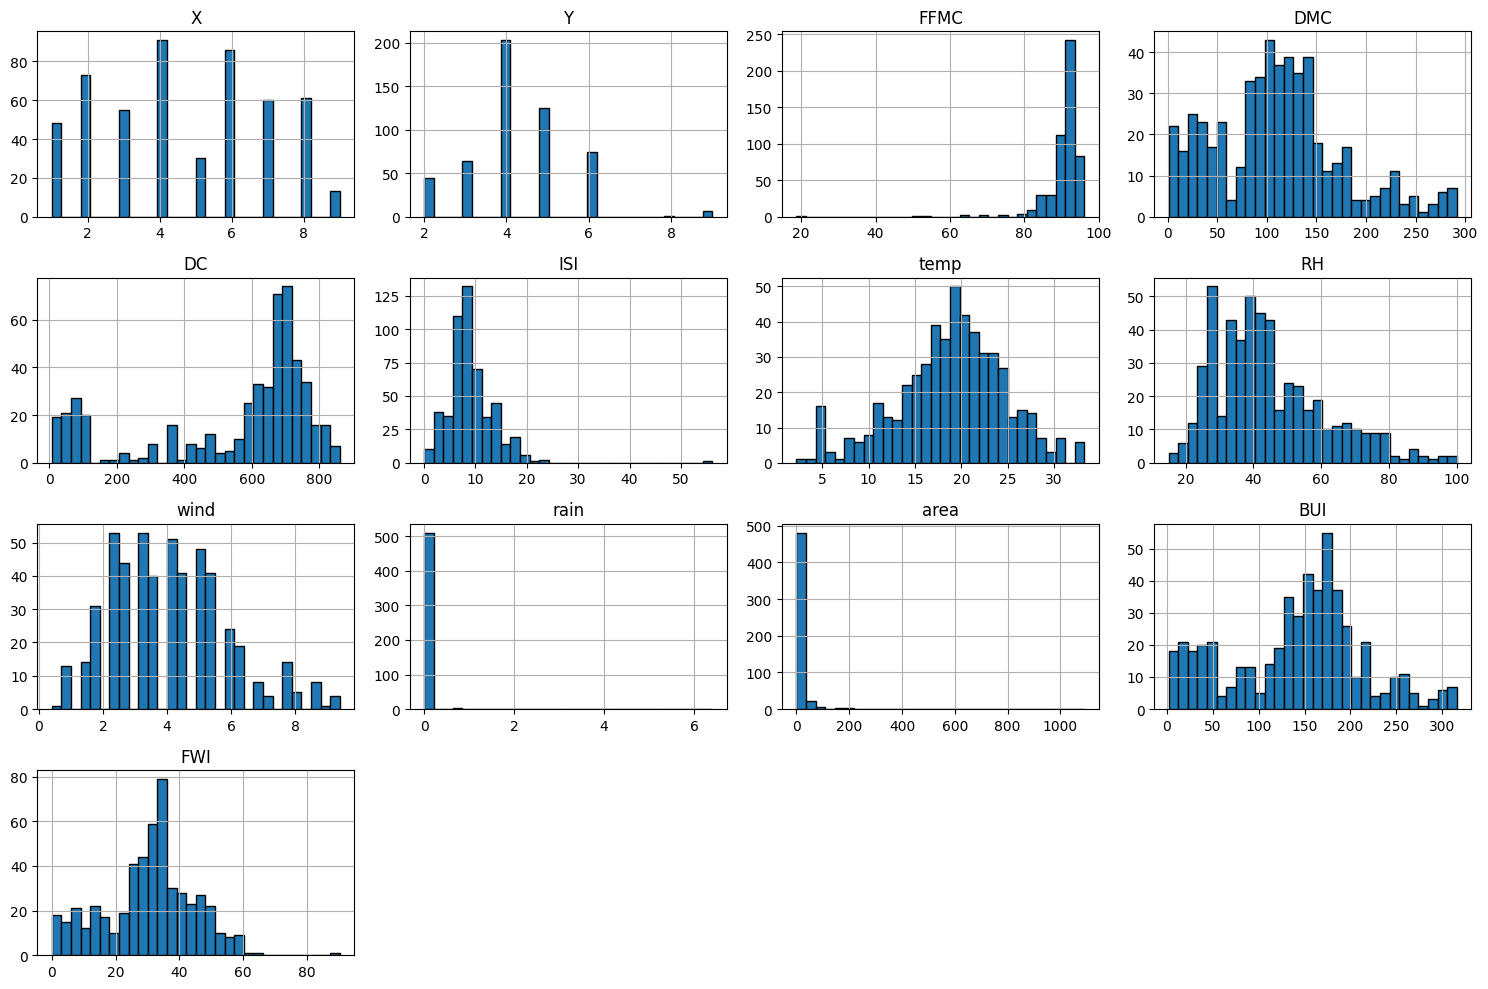

In [3]:
# Plot histograms for all features
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

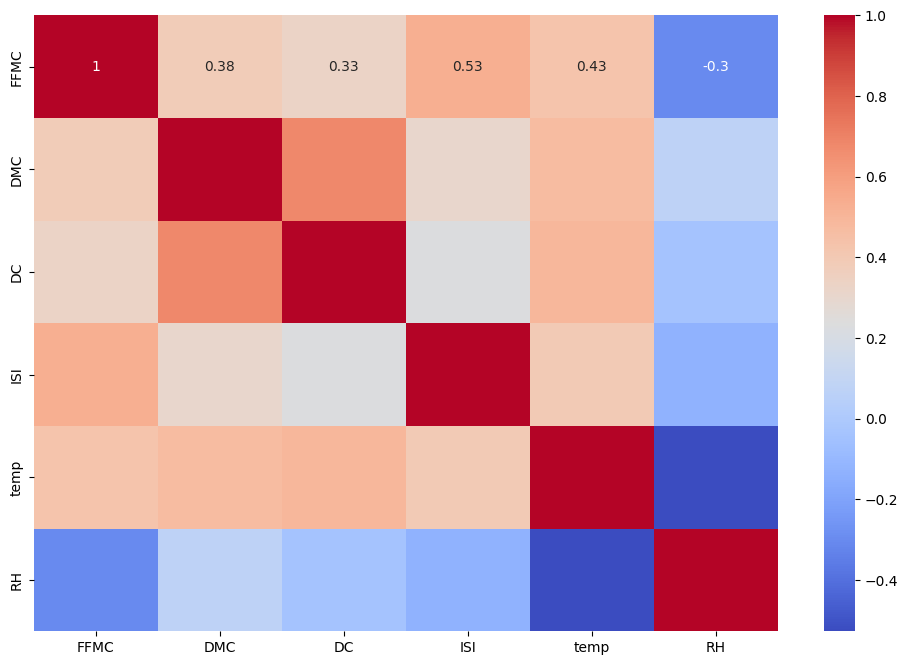

In [4]:
# seaborn.heatmap() to plot the correlation matrix
import seaborn as sns
small_data = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH']]
corr_matrix = small_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### task4.
* data choose: 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH'
* Reason: First, we check the histogram of all features and found that 'X', 'Y', 'rain', 'area' data are not really sutible target for statistical analyze.

In [5]:
print(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH']])
print(df.columns)

     FFMC    DMC     DC   ISI  temp  RH
0    86.2   26.2   94.3   5.1   8.2  51
1    90.6   35.4  669.1   6.7  18.0  33
2    90.6   43.7  686.9   6.7  14.6  33
3    91.7   33.3   77.5   9.0   8.3  97
4    89.3   51.3  102.2   9.6  11.4  99
..    ...    ...    ...   ...   ...  ..
512  81.6   56.7  665.6   1.9  27.8  32
513  81.6   56.7  665.6   1.9  21.9  71
514  81.6   56.7  665.6   1.9  21.2  70
515  94.4  146.0  614.7  11.3  25.6  42
516  79.5    3.0  106.7   1.1  11.8  31

[517 rows x 6 columns]
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


/var/folders/qz/sf6z_4r52qb5z4cmlh3bn0qc0000gp/T/ipykernel_5551/33892533.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_data[col] = normalization_range(small_data[col])
/var/folders/qz/sf6z_4r52qb5z4cmlh3bn0qc0000gp/T/ipykernel_5551/33892533.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_data[col] = normalization_zscore(small_data[col])


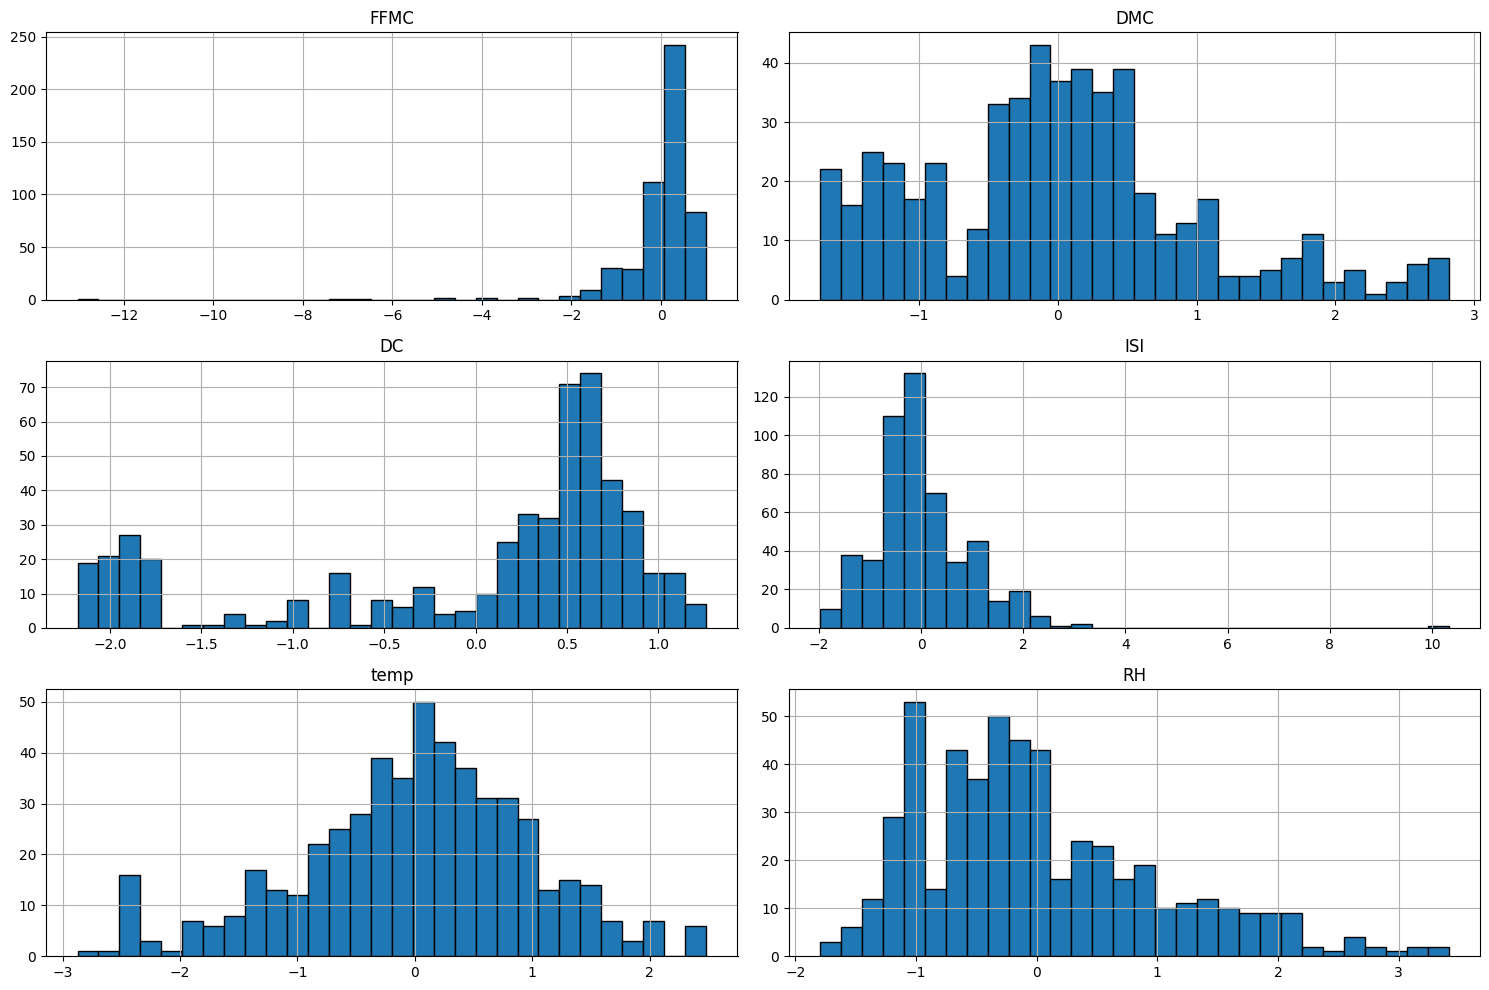

In [6]:
## Normalization
small_data = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH']]

def normalization_range(data):
    mean = data.mean()
    min = data.min()
    max = data.max()
    normalized_data = (data - mean) / (max - min)
    return normalized_data

def normalization_zscore(data):
    mean = data.mean()
    std = data.std()
    z_scores = (data - mean) / std
    return z_scores

# for all columns in small_data, apply normalization function
for col in small_data.columns:
    small_data[col] = normalization_range(small_data[col])
    small_data[col] = normalization_zscore(small_data[col])

# Plot histograms for all features
small_data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()